In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plotting style
sns.set_style("darkgrid")

# Load datasets
freeform_data = pd.read_csv("./freeform_csv/combined_freeform_data.csv")
torsion_data = pd.read_csv("./torsion_csv/combined_torsion_data.csv")

# Group and calculate the mean of the metrics for each method
freeform_grouped = (
    freeform_data.groupby("Strain Energy Cutoff")[
        ["deltaEF1%", "deltaEF5%", "Delta Linear Log10 AUC (x10)", "deltaAUC"]
    ]
    .mean()
    .reset_index()
    .rename(
        lambda x: x if x == "Strain Energy Cutoff" else x + "_freeform", axis="columns"
    )
)

torsion_grouped = (
    torsion_data.groupby("Strain Energy Cutoff")[
        ["deltaEF1%", "deltaEF5%", "Delta Linear Log10 AUC (x10)", "deltaAUC"]
    ]
    .mean()
    .reset_index()
    .rename(
        lambda x: x if x == "Strain Energy Cutoff" else x + "_torsion", axis="columns"
    )
)

# Merge both grouped data on the 'Strain Energy Cutoff'
merged_grouped_data = pd.merge(
    freeform_grouped,
    torsion_grouped,
    on="Strain Energy Cutoff",
    suffixes=("_freeform", "_torsion"),
)  

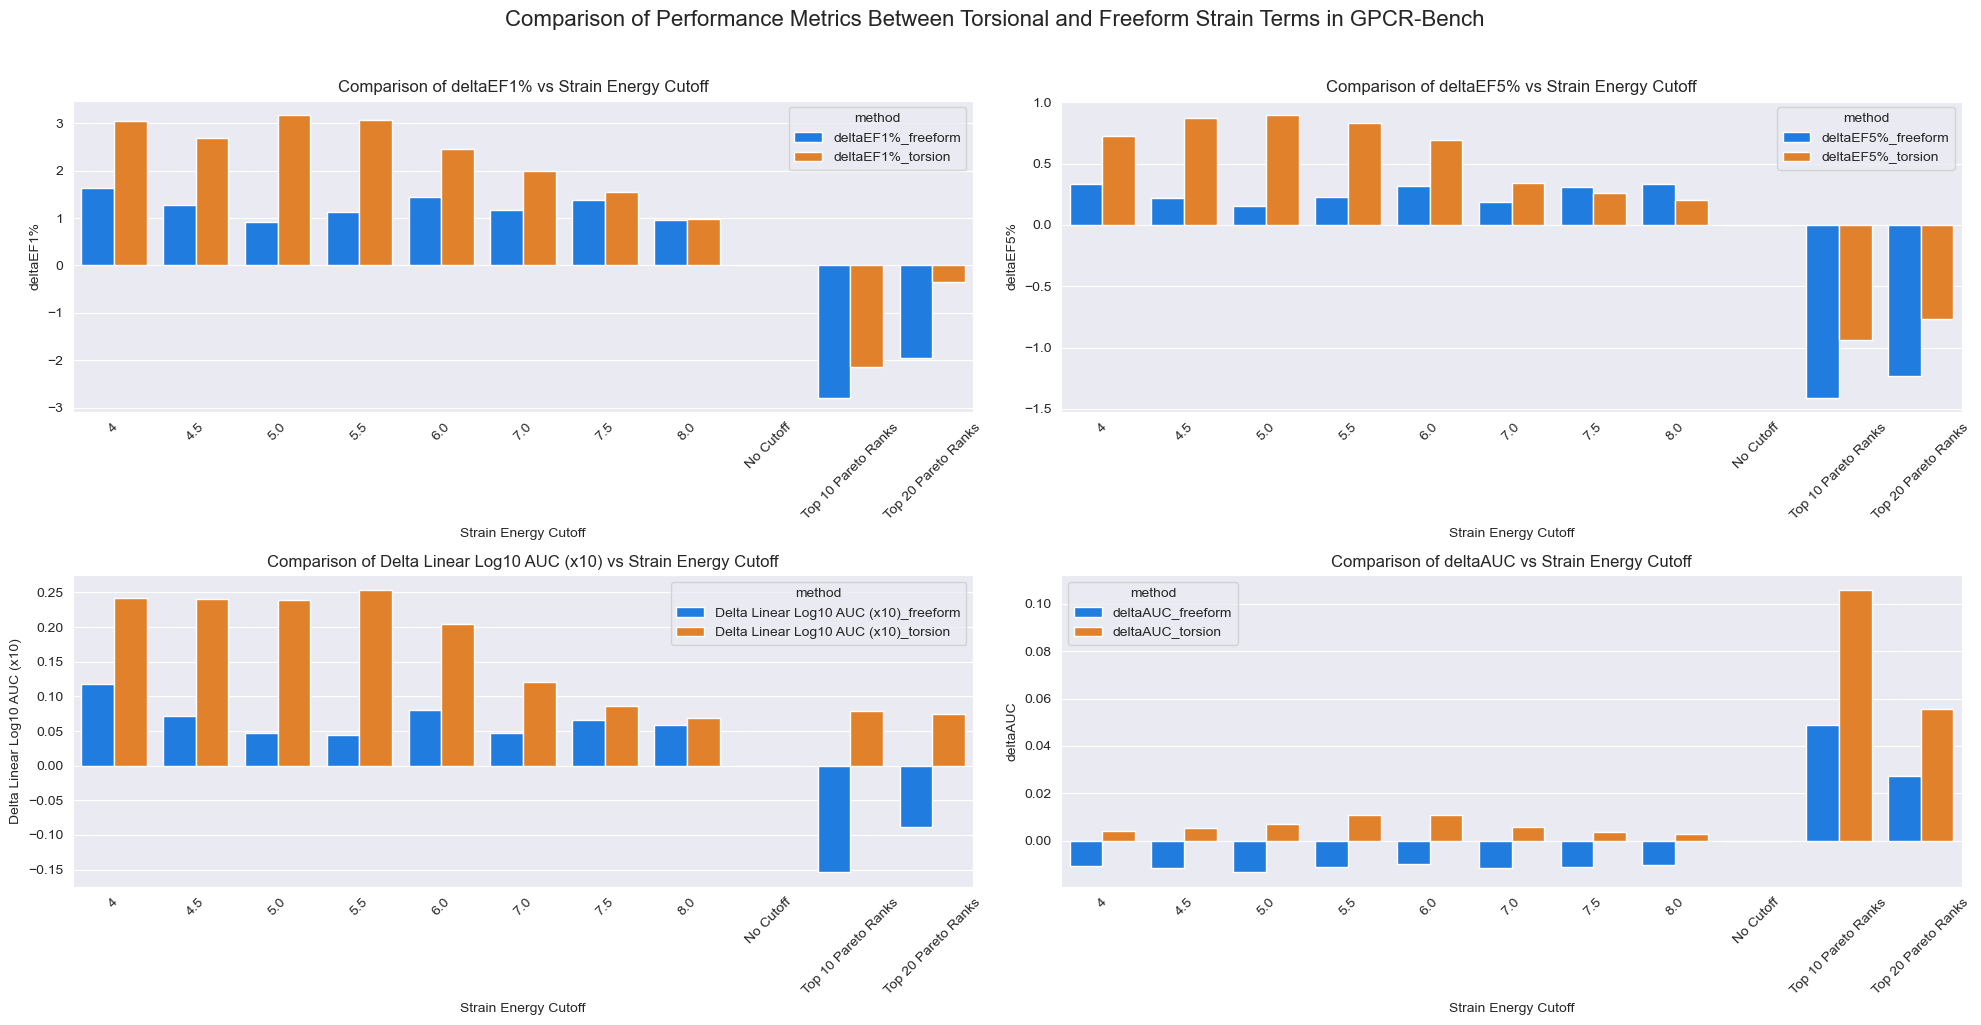

In [37]:
# Plotting
plt.figure(figsize=(20, 10))
metrics = ["deltaEF1%", "deltaEF5%", "Delta Linear Log10 AUC (x10)", "deltaAUC"]
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(
        x="Strain Energy Cutoff",
        y="value",
        hue="method",  # Differentiate between methods
        data=pd.melt(
            merged_grouped_data,
            id_vars=["Strain Energy Cutoff"],
            value_vars=[metric + "_freeform", metric + "_torsion"],
            var_name="method",
            value_name="value",
        ),
    )
    plt.xlabel("Strain Energy Cutoff")
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.title(f"Comparison of {metric} vs Strain Energy Cutoff")

# Adding a title above all subplots
plt.suptitle(
    "Comparison of Performance Metrics Between Torsional and Freeform Strain Terms in GPCR-Bench",
    fontsize=16,
    y=1.02,
)
plt.tight_layout()
plt.show()

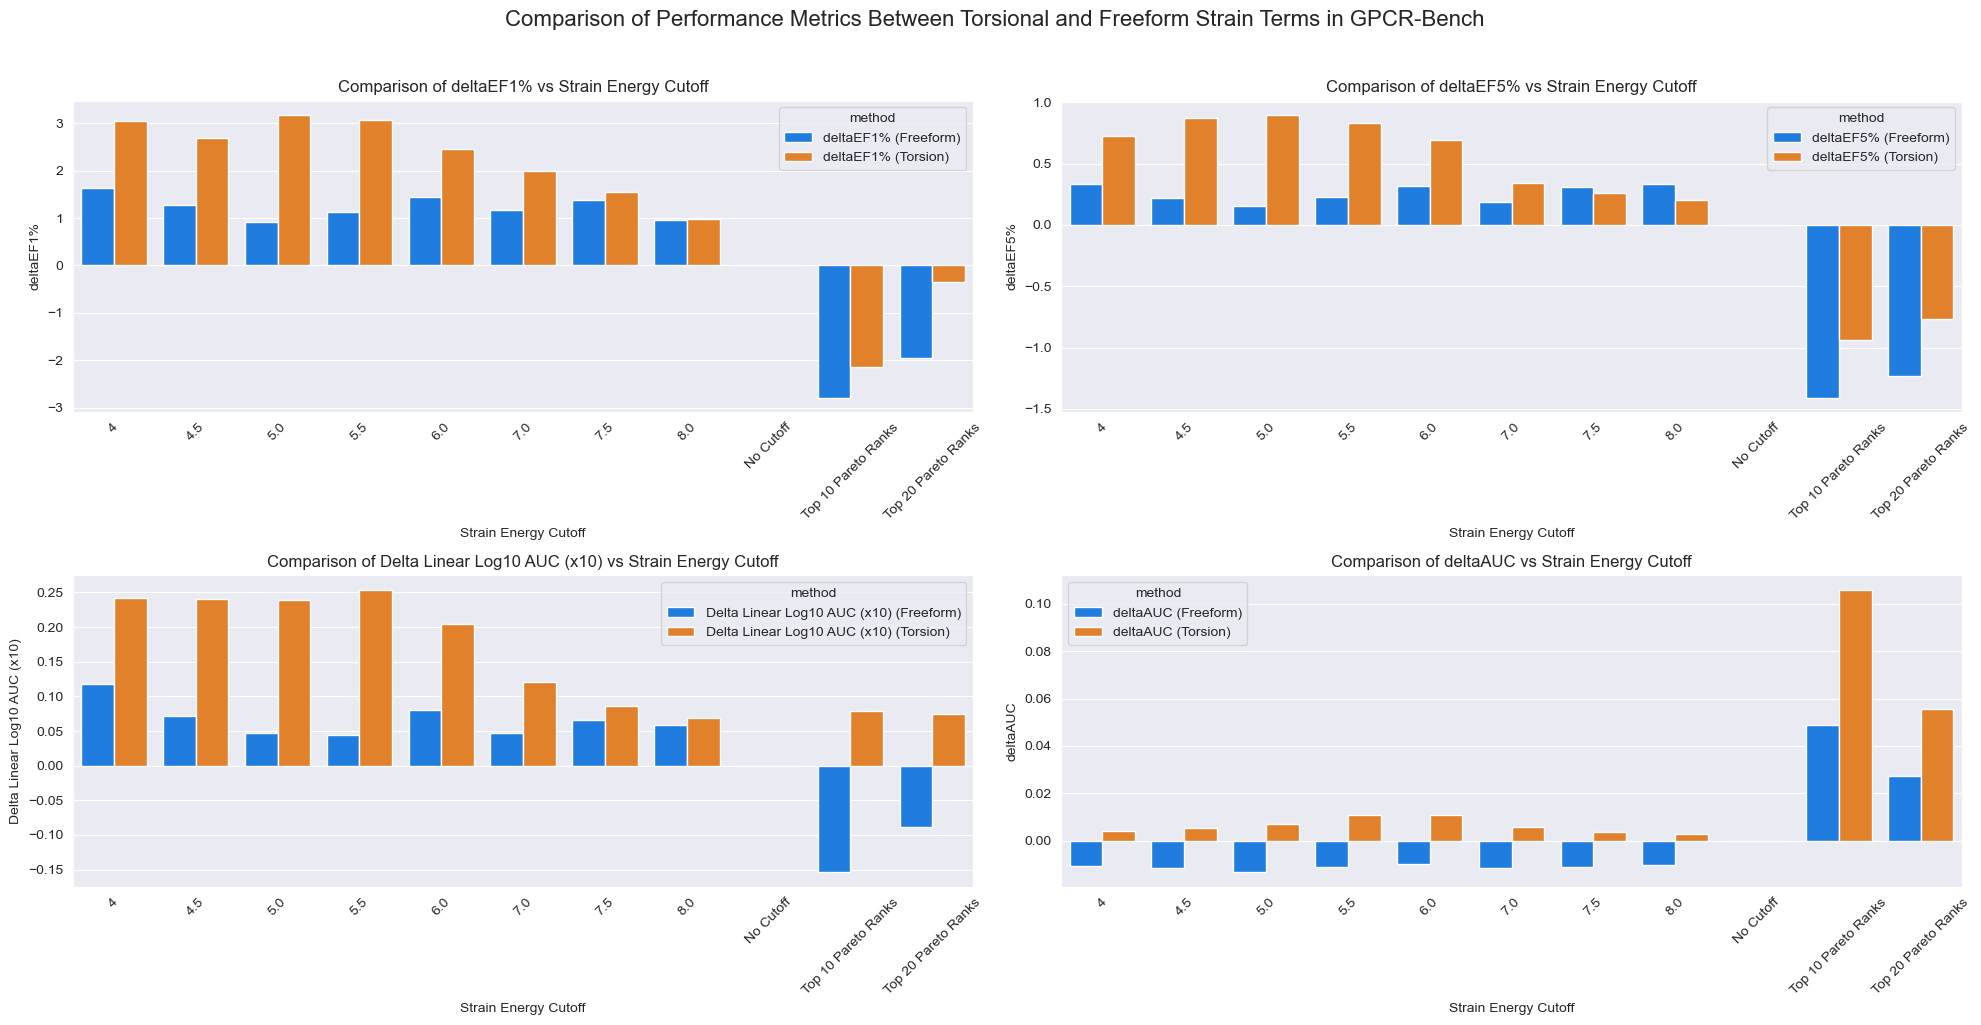

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming merged_grouped_data is prepared and loaded as before

# Plotting
plt.figure(figsize=(20, 10))
metrics = ["deltaEF1%", "deltaEF5%", "Delta Linear Log10 AUC (x10)", "deltaAUC"]
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    melted_data = pd.melt(
        merged_grouped_data,
        id_vars=["Strain Energy Cutoff"],
        value_vars=[metric + "_freeform", metric + "_torsion"],
        var_name="method",
        value_name="value",
    )

    # Adjust method column for cleaner legend labels
    melted_data["method"] = melted_data["method"].apply(
        lambda x: f"{metric} ({'Freeform' if 'freeform' in x else 'Torsion'})"
    )

    sns.barplot(
        x="Strain Energy Cutoff",
        y="value",
        hue="method",  # Differentiate between methods
        data=melted_data,
    )
    plt.xlabel("Strain Energy Cutoff")
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.title(f"Comparison of {metric} vs Strain Energy Cutoff")

# Adding a title above all subplots
plt.suptitle(
    "Comparison of Performance Metrics Between Torsional and Freeform Strain Terms in GPCR-Bench",
    fontsize=16,
    y=1.02,
)
plt.tight_layout()
plt.show()

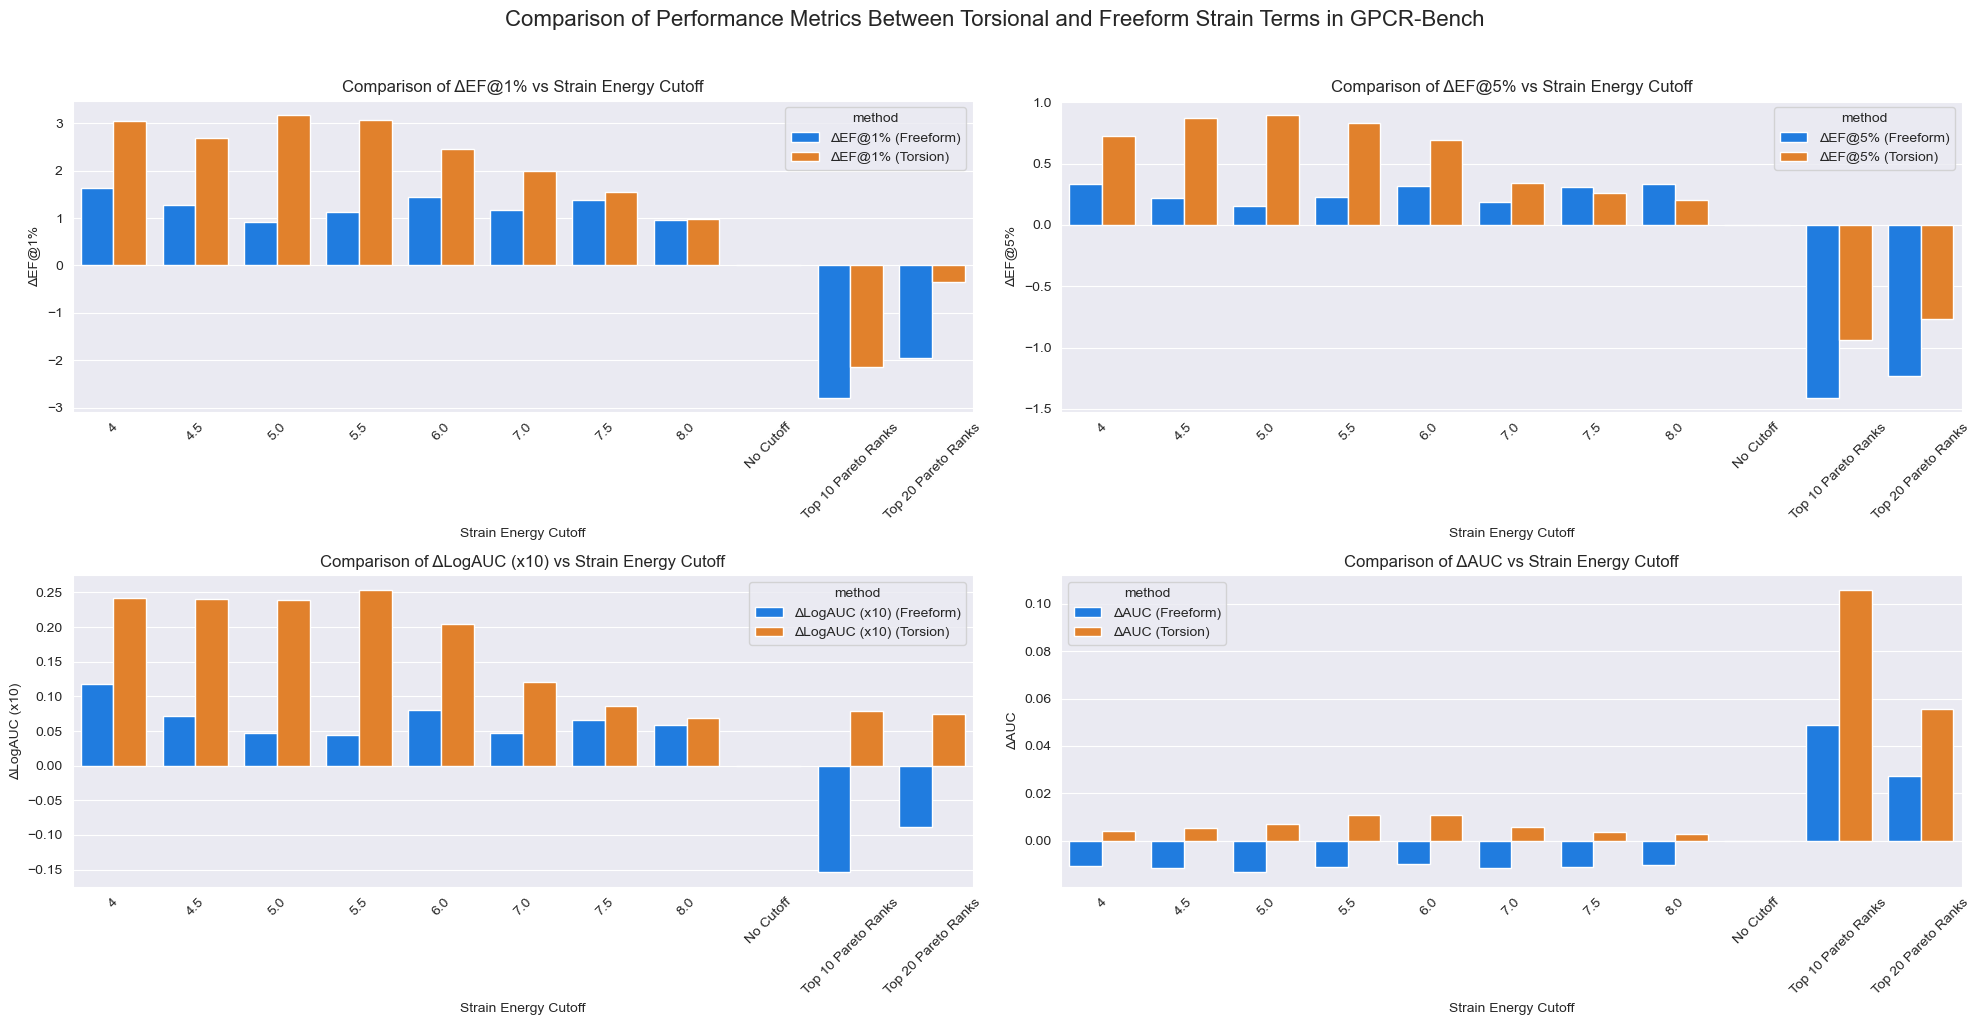

In [32]:
# Plotting
plt.figure(figsize=(20, 10))
metrics = ["deltaEF1%", "deltaEF5%", "Delta Linear Log10 AUC (x10)", "deltaAUC"]
formatted_metrics = [
    "ΔEF@1%",
    "ΔEF@5%",
    "ΔLogAUC (x10)",
    "ΔAUC",
]  # Formatted metric names with Delta symbol

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    formatted_metric = formatted_metrics[i - 1]  # Corresponding formatted metric name
    melted_data = pd.melt(
        merged_grouped_data,
        id_vars=["Strain Energy Cutoff"],
        value_vars=[metric + "_freeform", metric + "_torsion"],
        var_name="method",
        value_name="value",
    )

    # Adjust method column for cleaner legend labels using formatted metric names
    melted_data["method"] = melted_data["method"].apply(
        lambda x: f"{formatted_metric} ({'Freeform' if 'freeform' in x else 'Torsion'})"
    )

    sns.barplot(
        x="Strain Energy Cutoff",
        y="value",
        hue="method",  # Differentiate between methods
        data=melted_data,
    )
    plt.xlabel("Strain Energy Cutoff")
    plt.ylabel(formatted_metric)
    plt.xticks(rotation=45)
    plt.title(f"Comparison of {formatted_metric} vs Strain Energy Cutoff")

# Adding a title above all subplots
plt.suptitle(
    "Comparison of Performance Metrics Between Torsional and Freeform Strain Terms in GPCR-Bench",
    fontsize=16,
    y=1.02,
)
plt.tight_layout()
plt.show()

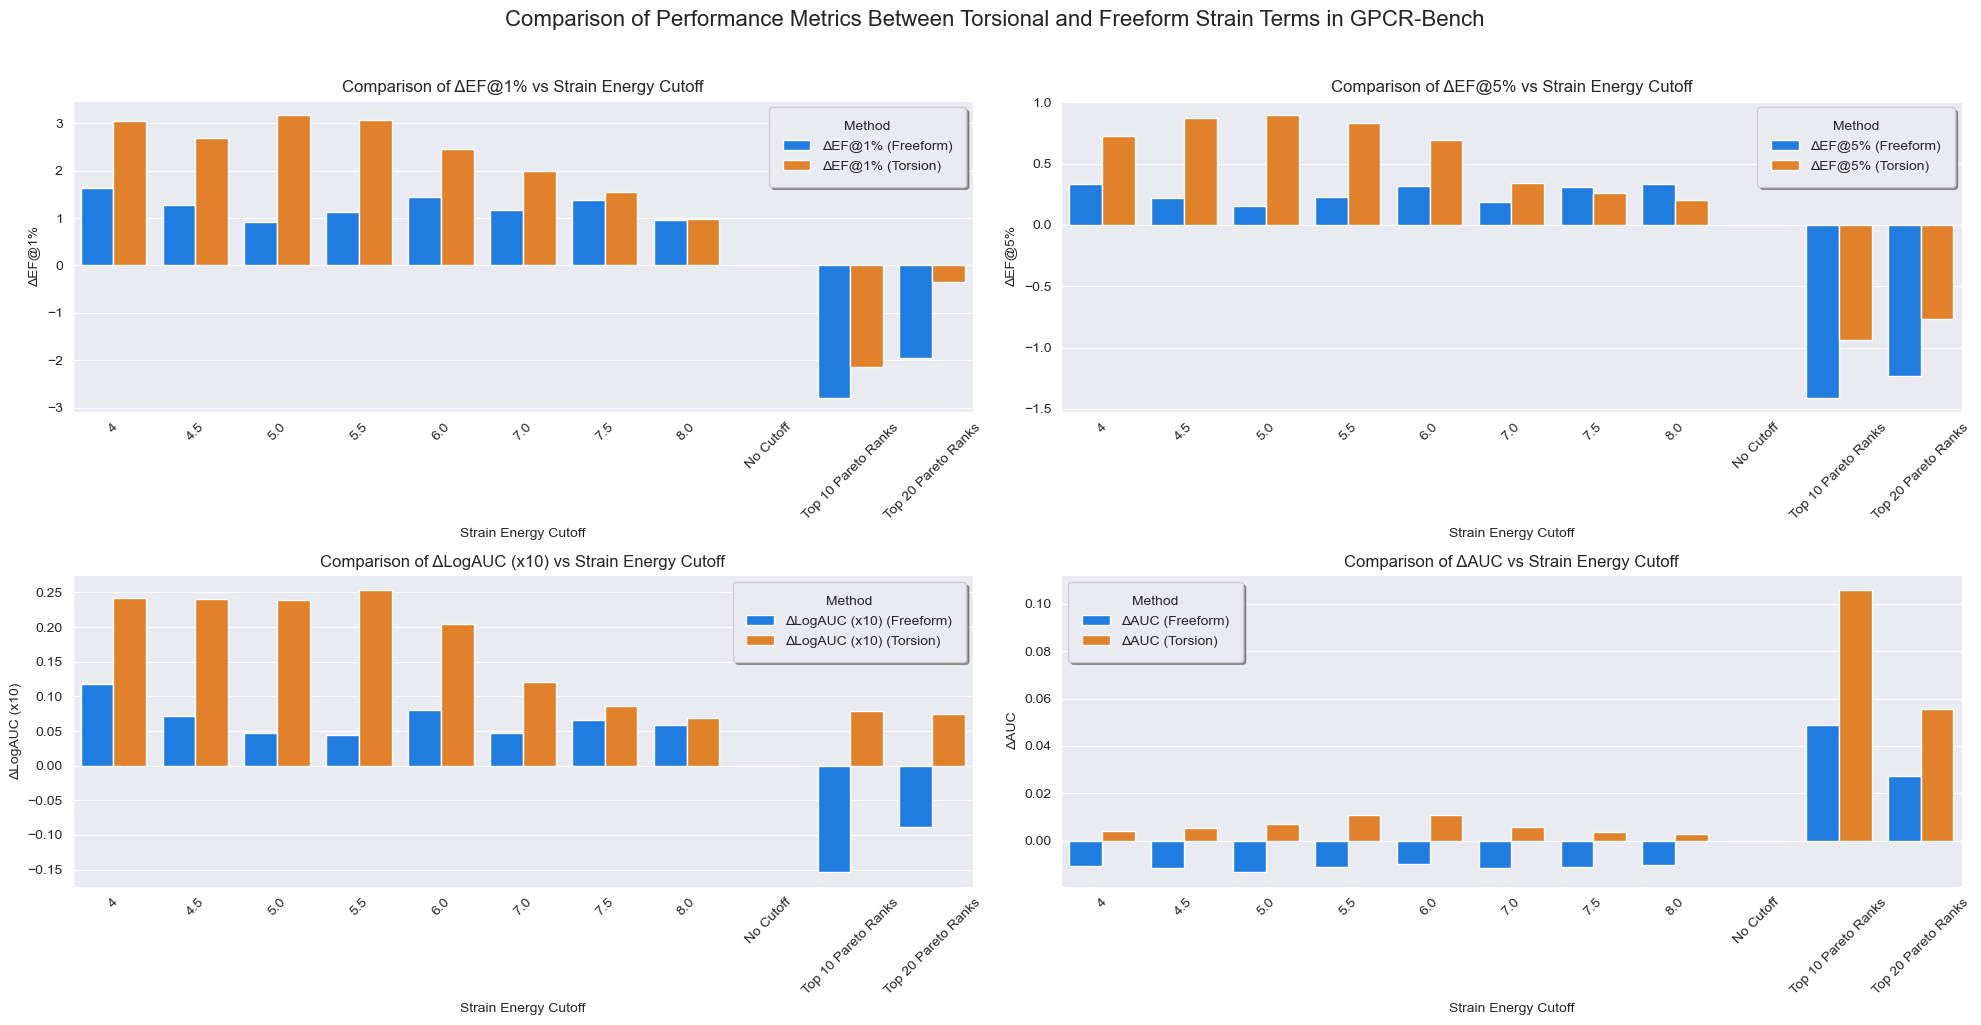

In [33]:
# Set a color palette
sns.set_palette(sns.color_palette(["#007bff", "#ff7f0e"]))  # Blue and Orange

# Plotting
plt.figure(figsize=(20, 10))
metrics = ["deltaEF1%", "deltaEF5%", "Delta Linear Log10 AUC (x10)", "deltaAUC"]
formatted_metrics = [
    "ΔEF@1%",
    "ΔEF@5%",
    "ΔLogAUC (x10)",
    "ΔAUC",
]  # Formatted metric names with Delta symbol

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    formatted_metric = formatted_metrics[i - 1]  # Corresponding formatted metric name
    melted_data = pd.melt(
        merged_grouped_data,
        id_vars=["Strain Energy Cutoff"],
        value_vars=[metric + "_freeform", metric + "_torsion"],
        var_name="method",
        value_name="value",
    )

    # Adjust method column for cleaner legend labels using formatted metric names
    melted_data["method"] = melted_data["method"].apply(
        lambda x: f"{formatted_metric} ({'Freeform' if 'freeform' in x else 'Torsion'})"
    )

    bar_plot = sns.barplot(
        x="Strain Energy Cutoff",
        y="value",
        hue="method",  # Differentiate between methods
        data=melted_data,
    )

    plt.xlabel("Strain Energy Cutoff")
    plt.ylabel(formatted_metric)
    plt.xticks(rotation=45)
    plt.title(f"Comparison of {formatted_metric} vs Strain Energy Cutoff")

    # Enhancing legend readability
    plt.legend(title="Method", frameon=True, shadow=True, borderpad=1)

# Adding a title above all subplots
plt.suptitle(
    "Comparison of Performance Metrics Between Torsional and Freeform Strain Terms in GPCR-Bench",
    fontsize=16,
    y=1.02,
)
plt.tight_layout()
plt.show()


In [34]:
merged_grouped_data

,Strain Energy Cutoff,deltaEF1%_freeform,deltaEF5%_freeform,Delta Linear Log10 AUC (x10)_freeform,deltaAUC_freeform,deltaEF1%_torsion,deltaEF5%_torsion,Delta Linear Log10 AUC (x10)_torsion,deltaAUC_torsion
0,4,1.637612,0.336621,0.118358,-0.010738,3.040564,0.726762,0.242081,0.004283
1,4.5,1.268833,0.216768,0.071258,-0.011485,2.676752,0.868313,0.240523,0.005229
2,5.0,0.906805,0.157382,0.047243,-0.013369,3.177900,0.898233,0.238614,0.007164
3,5.5,1.120510,0.230874,0.044038,-0.011268,3.056906,0.833263,0.254145,0.010992
4,6.0,1.434070,0.316940,0.079680,-0.009895,2.449369,0.690452,0.204223,0.010984
5,7.0,1.171766,0.185513,0.047718,-0.011616,1.981785,0.338963,0.120198,0.005755
6,7.5,1.379901,0.304533,0.065178,-0.011235,1.540104,0.256829,0.085887,0.003596
7,8.0,0.956015,0.333209,0.058785,-0.010055,0.987524,0.203646,0.069140,0.002941
8,No Cutoff,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Top 10 Pareto Ranks,-2.781359,-1.407508,-0.154249,0.048905,-2.143003,-0.941626,0.078719,0.105946


In [35]:
torsion_data

,Protein,Strain Energy Cutoff,EF1%,EF5%,deltaEF1%,deltaEF5%,Linear Log10 AUC (x10),Delta Linear Log10 AUC (x10),ROC_AUC,Actives,Total Count,deltaAUC
0,CCR5,No Cutoff,2.907300,0.873871,0.000000,0.000000,1.372233,0.000000,0.485772,206,10381,0.000000
1,CCR5,4,7.877143,1.598261,4.969843,0.724390,1.384735,0.012502,0.519078,25,2757,0.033306
2,CCR5,4.5,4.592691,0.929157,1.685391,0.055287,1.272428,-0.099805,0.510033,43,3456,0.024262
3,CCR5,5.0,6.615873,2.003846,3.708573,1.129976,1.518871,0.146638,0.536768,60,4168,0.050996
4,CCR5,5.5,5.529680,1.919393,2.622380,1.045523,1.549993,0.177760,0.536478,73,4844,0.050706
...,...,...,...,...,...,...,...,...,...,...,...,...
259,P2Y12,7.0,22.152131,10.101911,12.352865,0.923092,4.617227,0.341858,0.873457,109,7948,0.000863
260,P2Y12,7.5,21.748235,10.157143,11.948969,0.978324,4.582612,0.307244,0.867979,120,8532,-0.004616
261,P2Y12,8.0,20.231595,10.085196,10.432329,0.906378,4.515195,0.239826,0.866340,133,9069,-0.006255
262,P2Y12,Top 10 Pareto Ranks,0.000000,0.843137,-9.799266,-8.335682,2.847280,-1.428088,0.836458,24,344,-0.036136
